### Import libraries

In [242]:
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.stats.proportion as st_model
import math

## Import and first contact with the Database

In [2]:
data = pd.read_csv('Data/heart.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [4]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# 1.- Description of the sample data

##  --- Age ---

In [5]:
age_mean = data['age'].mean()
age_std = data['age'].std()

In [6]:
print(f'The age mean of my sample is {age_mean:.2f} with an std of {age_std:.2f}.')

The age mean of my sample is 54.37 with an std of 9.08.


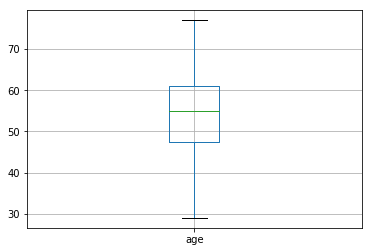

In [7]:
data.boxplot(column = ['age'])

/home/atwenter/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


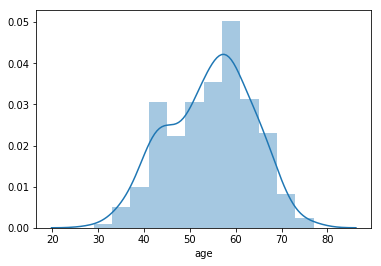

In [8]:
sns.distplot(data['age'])

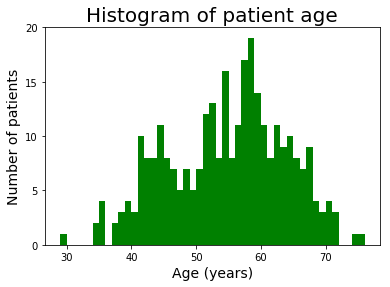

In [205]:
plt.hist(data['age'], bins = np.arange(data['age'].min(), data['age'].max()), color= 'green')

plt.xlabel('Age (years)', size = 14)
plt.ylabel('Number of patients', size = 14)
plt.title('Histogram of patient age', size=20)
plt.yticks(np.arange(0, 21, 5))
plt.savefig('Graphs/hist_age.svg', format='svg', dpi=1200)

## --- Gender ---

### Analysis sex sample vs sex population. 

In [12]:
men = data[data['sex']== 1]['sex'].count()
women = data[data['sex'] == 0]['sex'].count()

In [13]:
print(f'In my sample there are {men} men ({men/(men+women):.2f}%), and {women} women ({women/(men+women):.2f}%).')

In my sample there are 207 men (0.68%), and 96 women (0.32%).


#### Considering that human population is approximately 50% women and 50% men, is my sample following that distribution?

To answer that question, I'll compare the value obtained of 0.68% with the population value of 0.50% using T-Student test.
I assume a confidence of 99%. Alpha = 0.01

H0: Both proportions are equal (mean sample == mean pop).
H1: Both proportions are not equal (mean sample != mean pop).

In [14]:
st.ttest_1samp(data['sex'], 0.5)

Ttest_1sampResult(statistic=6.841883348437271, pvalue=4.352961409325433e-11)

The small value of p-value force me to reject H0 and thus accept that both proportions are not equal.

However, as it is stated in "Sex differences in coronary heart disease and stroke mortality: a global assessment of the effect of ageing between 1980 and 2010"(https://gh.bmj.com/content/2/2/e000298), "CHD mortality was up to five times higher in men than women" during this period and for a selection of countries. So, as the mortality rate is higher in men than in women is understandable that in the data we find more men than women.

### Graphs ---

In [105]:
data_gen = pd.DataFrame({'Gender': ['Men', 'Women'], 'Number of patients' :[data[data['sex'] == 1].count()['sex'], data[data['sex'] == 0].count()['sex']] })

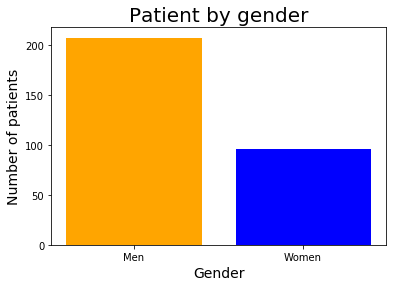

In [181]:

plt.bar(data_gen['Gender'], data_gen['Number of patients'], color = ['orange', 'blue'])

plt.xlabel('Gender', size = 14)
plt.ylabel('Number of patients', size = 14)
plt.title('Patient by gender', size=20)
plt.yticks(np.arange(0, 201, 50))


plt.savefig('Graphs/bar_gender.svg', format='svg', dpi=1200)

# 2.- Analysis of Chest Pain variable.
# Does Chest Pain correlates with Heart Attack?

## Description of the Chest Pain (CP) variable

0: Absence of pain; 
1: typical angina; 
2: atypical angina; 
3: non-anginal pain

### Total Counts. Plot of the total number of persons that have chest pain grouping by kind of pain. 

[Text(0, 0.5, 'Number of patients'), Text(0.5, 0, 'Chest Pain')]

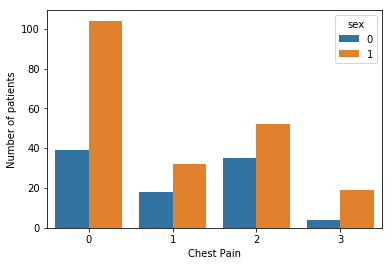

In [60]:
g = sns.countplot(data['cp'], hue=data['sex'])

new_labels = ['Women', 'Men']

g.set(xlabel ='Chest Pain', ylabel ='Number of patients')

#plt.savefig('Graphs/cp_age.svg', format='svg', dpi=1200)

### Proportions. Percentage of men or women that have each kind of chest pain.


In [16]:
data_cp_gender_proportions = pd.DataFrame({'0 - Absence pain': [(data[(data['cp'] == 0) & (data['sex'] == 1)].count()['sex']/data[data['sex'] == 1].count()['sex']), (data[(data['cp'] == 0) & (data['sex'] == 0)].count()['sex']/data[data['sex'] == 0].count()['sex'])],
                         '1 - Typical angina' : [(data[(data['cp'] == 1) & (data['sex'] == 1)].count()['sex']/data[data['sex'] == 1].count()['sex']), (data[(data['cp'] == 1) & (data['sex'] == 0)].count()['sex']/data[data['sex'] == 0].count()['sex'])],
                         '2 - Atypical angina': [(data[(data['cp'] == 2) & (data['sex'] == 1)].count()['sex']/data[data['sex'] == 1].count()['sex']), (data[(data['cp'] == 2) & (data['sex'] == 0)].count()['sex']/data[data['sex'] == 0].count()['sex'])],
                         '3- Non-anginal pain': [(data[(data['cp'] == 3) & (data['sex'] == 1)].count()['sex']/data[data['sex'] == 1].count()['sex']), (data[(data['cp'] == 3) & (data['sex'] == 0)].count()['sex']/data[data['sex'] == 0].count()['sex'])]})

In [17]:
data_cp_gender_proportions

,0 - Absence pain,1 - Typical angina,2 - Atypical angina,3- Non-anginal pain
0,0.502415,0.154589,0.251208,0.091787
1,0.406250,0.187500,0.364583,0.041667


### Plot grouped by Gender 

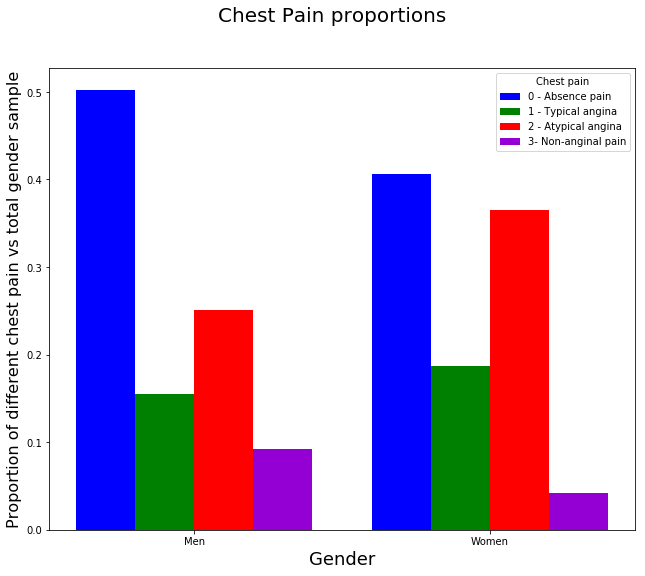

In [18]:
divisions = ['Men', 'Women']
index = np.arange(len(divisions))
w = 0.2

plt.bar(index,data_cp_gender_proportions['0 - Absence pain'],w, color='blue')
plt.bar(index + w,data_cp_gender_proportions['1 - Typical angina'],w,color='green')
plt.bar(index + 2*w,data_cp_gender_proportions['2 - Atypical angina'],w,color='red')
plt.bar(index + 3*w,data_cp_gender_proportions['3- Non-anginal pain'],w,color='darkviolet')


#ax.autoscale(tight=True)
plt.xticks(index + 1.5*w, divisions)
fig = plt.gcf()
fig.set_size_inches(10.5, 8.5)

plt.legend(title='Chest pain', loc='upper right', labels=['0 - Absence pain', '1 - Typical angina', '2 - Atypical angina',
       '3- Non-anginal pain'])


fig.suptitle('Chest Pain proportions', fontsize=20)
plt.xlabel('Gender', fontsize=18)
plt.ylabel('Proportion of different chest pain vs total gender sample', fontsize=16)

plt.show()

### Plot grouped by Chest pain

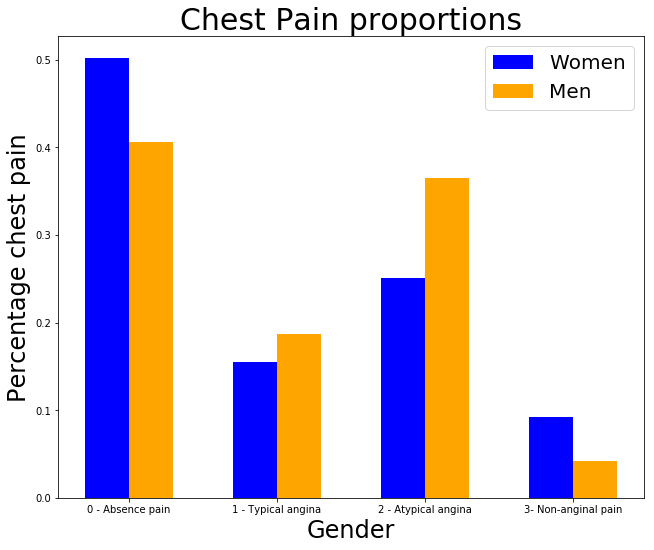

In [112]:
divisions = ['0 - Absence pain', '1 - Typical angina', '2 - Atypical angina', '3- Non-anginal pain']
index = np.arange(len(divisions))
w = 0.3

plt.bar(index,data_cp_gender_proportions.iloc[0],w, color='blue')
plt.bar(index + w,data_cp_gender_proportions.iloc[1],w,color='orange')


#ax.autoscale(tight=True)
plt.xticks(index + 0.5*w, divisions)
fig = plt.gcf()
fig.set_size_inches(10.5, 8.5)

plt.legend( loc='upper right', labels=['Women', 'Men'], fontsize= 20)


plt.title('Chest Pain proportions', fontsize=30)
plt.xlabel('Gender', fontsize=24)
plt.ylabel('Percentage chest pain', fontsize=24)

plt.savefig('Graphs/chest_pain.svg', format='svg', dpi=1200)
plt.show()



### Proportion of men or women that have or not chest pain.

In [246]:
data_cp_gender_proportions2 = pd.DataFrame({'Index': ['Men', 'Women'],
                        'Absence pain': [(data[(data['cp'] == 0) & (data['sex'] == 1)].count()['sex']/data[data['sex'] == 1].count()['sex']), (data[(data['cp'] == 0) & (data['sex'] == 0)].count()['sex']/data[data['sex'] == 0].count()['sex'])       ],
                         'Chest pain' : [(data[(data['cp'] != 0) & (data['sex'] == 1)].count()['sex']/data[data['sex'] == 1].count()['sex']), (data[(data['cp'] != 0) & (data['sex'] == 0)].count()['sex']/data[data['sex'] == 0].count()['sex']) ]})
                         

In [247]:
data_cp_gender_proportions2 

,Index,Absence pain,Chest pain
0,Men,0.502415,0.497585
1,Women,0.406250,0.593750


In [248]:
data_cp_gender_proportions2 = data_cp_gender_proportions2.drop(columns='Index')

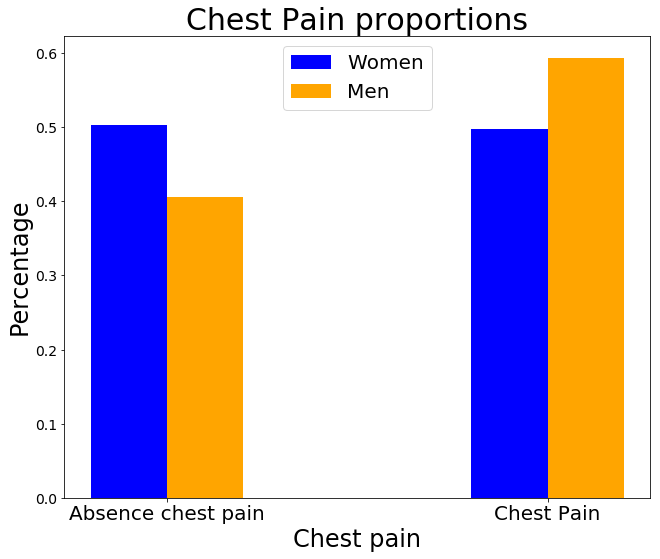

In [249]:
divisions = ['Absence chest pain', 'Chest Pain']
index = np.arange(len(divisions))
w = 0.2

plt.bar(index,data_cp_gender_proportions2.iloc[0],w, color='blue')
plt.bar(index + w,data_cp_gender_proportions2.iloc[1],w,color='orange')

#ax.autoscale(tight=True)
plt.xticks(index + 0.5*w, divisions)
fig = plt.gcf()
fig.set_size_inches(10.5, 8.5)

plt.legend( loc='upper center', labels=['Women', 'Men', 'Heart Attack (W + M)'], fontsize= 20)


plt.title('Chest Pain proportions', fontsize=30)
plt.xlabel('Chest pain', fontsize=24)
plt.ylabel('Percentage', fontsize=24)
plt.xticks(size = 20)
plt.yticks(size = 14)


plt.savefig('Graphs/chest_pain_2.svg', format='svg', dpi=1200)

plt.show()

### Are the proportions from men and women equal?

In [233]:
data_cp_gender_proportions4 = pd.DataFrame({'Proportions' : [103/(104+103), 57/(39+57)], 'Total' : [104+103, 39+57]})

In [234]:
data_cp_gender_proportions4

,Proportions,Total
0,0.497585,207
1,0.593750,96


In order to check if both proportions are equal or not, I'll use I compare both distributions with this statistic: https://stats.stackexchange.com/questions/113602/test-if-two-binomial-distributions-are-statistically-different-from-each-other) with a 99% of confidence (alpha = 1%, 0.01).

H0: Both proportions are equal
H1: Both proportions are not equal


In [238]:
p1 = data_cp_gender_proportions4['Proportions'][0]

In [239]:
p2 = data_cp_gender_proportions4['Proportions'][1]

In [240]:
n1 = data_cp_gender_proportions4['Total'][0]

In [241]:
n2 = data_cp_gender_proportions4['Total'][1]

In [243]:
p = (n1*p1 + n2*p2) / (n1+n2)

In [244]:
z = (p1-p2) / (math.sqrt(p*(1-p)*((1/n1) + (1/n2))))

In [245]:
z

-1.5600309048733874

For confidence level of 95%, the z-alpha/2  = 1.96. As the absolute z value for this test is smaller than z-alpha/2, we cannot reject H0, and thus, we accept that both proportions are equal. 
#### Yes, both proportions are equal

## Analysis of chest pain vs heart attack. 


### Proportion of heart attack group by Chest pain

In [250]:
data_cp_gender_proportions3 = pd.DataFrame({'Index': ['Men', 'Women', 'Heart Attack'],
                        'Absence pain': [(data[(data['cp'] == 0) & (data['sex'] == 1)].count()['sex']/data[data['sex'] == 1].count()['sex']), (data[(data['cp'] == 0) & (data['sex'] == 0)].count()['sex']/data[data['sex'] == 0].count()['sex']), (data[(data['target'] == 1) & (data['cp'] == 0)].count()['sex'])/data[data['cp'] == 0].count()['sex']        ],
                         'Chest pain' : [(data[(data['cp'] != 0) & (data['sex'] == 1)].count()['sex']/data[data['sex'] == 1].count()['sex']), (data[(data['cp'] != 0) & (data['sex'] == 0)].count()['sex']/data[data['sex'] == 0].count()['sex']), (data[(data['target'] == 1) & (data['cp'] != 0)].count()['sex'])/data[data['cp'] != 0].count()['sex']       ]})
                         

In [252]:
data_cp_gender_proportions3

,Index,Absence pain,Chest pain
0,Men,0.502415,0.497585
1,Women,0.406250,0.593750
2,Heart Attack,0.272727,0.787500


In [253]:
data_cp_gender_proportions3 = data_cp_gender_proportions3.drop(columns='Index')

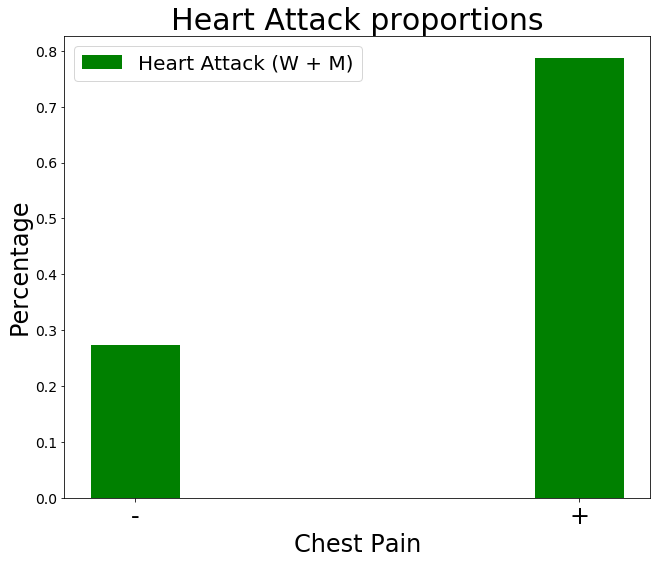

In [255]:
divisions = ['-', '+']
index = np.arange(len(divisions))
w = 0.2

#plt.bar(index,data_cp_gender_proportions2.iloc[0],w, color='blue')
#plt.bar(index + w,data_cp_gender_proportions2.iloc[1],w,color='orange')
plt.bar(index + w,data_cp_gender_proportions3.iloc[2],w,color='green')

#ax.autoscale(tight=True)
plt.xticks(index + 1*w, divisions)
fig = plt.gcf()
fig.set_size_inches(10.5, 8.5)

plt.legend( loc='upper left', labels=['Heart Attack (W + M)'], fontsize= 20)


plt.title('Heart Attack proportions', fontsize=30)
plt.xlabel('Chest Pain', fontsize=24)
plt.ylabel('Percentage', fontsize=24)
plt.xticks(size = 24)
plt.yticks(size = 14)


plt.savefig('Graphs/chest_pain_5.svg', format='svg', dpi=1200, transparent=True)

plt.show()


### Check whether chest pain (CP) correlates with heart attack (target). 

In [20]:
data_cp = data.copy()

I combine all pains (from the cp column, 1-3 are pain, 0 is absence of pain), to obtain a new column where 1 is pain (any of them) and 0 absence of pain. 

In [21]:
data_cp['cp_01'] = data_cp.apply(lambda x : 1 if x['cp']==1 or x['cp']==2 or x['cp']==3 else 0, axis=1 )

In [22]:
cp_ct = pd.crosstab(data_cp['cp_01'], data['target'])

In [23]:
cp_ct

target,0,1
cp_01,,
0,104,39
1,34,126


### Chi squared test to check chest pain & heart attack dependency 

I want to know if the presence of pain (cp_01 column) is related to having a heart attack (target column) [0 no, 1 yes]. 
For that, I have created a contingency table where the frequencies of both results are displayed. 

In order to check if both frequencies are equal or not, I'll use the Chi2 test with a 99% of confidence (alpha = 1%, 0.01).

H0: Both variables are independent
H1: Both variables are dependent


In [204]:
st.chi2_contingency(cp_ct)

(78.61792365305148,
 7.536253364682719e-19,
 1,
 array([[65.12871287, 77.87128713],
        [72.87128713, 87.12871287]]))

The low p-value obtained (< 0.01) force me to reject H0 and thus accept H1. That means that I accept that both variables are dependent, and thus, having a chest pain is an indicator of having a heart attack.

### Yes, both variables correlate each other.

However, in which proportion does they correlate? Can we calculate it's correlation? 

### Calculate the confidence interval for all binomial probabilities for the chest pain / heart attack variables.   

To know that, I'll calculate the confidence interval for a binomial proportion.
### The interval of probability to have heart attack if you have chest pain with an alpha of 0.01. 

In [24]:
st_model.proportion_confint(126, 160, alpha=0.01)

(0.704196770843009, 0.8708032291569909)

### If you don't have chest pain, to have a heart attack (alpha of 0.01).

In [25]:
st_model.proportion_confint(39, 143, alpha=0.01)

(0.17679560455777604, 0.36865894089676937)

### If you have chest pain, not to have a heart attack (alpha of 0.01).

In [26]:
st_model.proportion_confint(34, 160, alpha=0.01)

(0.129196770843009, 0.295803229156991)

### If you don't have chest pain, not to have a heart attack (alpha of 0.01).

In [27]:
st_model.proportion_confint(39, 143, alpha=0.01)

(0.17679560455777604, 0.36865894089676937)

# 2.- Analysis of Diabetes variable. 
# Does diabetes correlates with chest pain?

In [28]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Total counts of persons that have different chest pain vs diabetes marker

In [37]:
data_fbs = pd.crosstab(data['cp'], data['fbs'])

In [38]:
data_fbs

fbs,0,1
cp,,
0,125,18
1,45,5
2,70,17
3,18,5


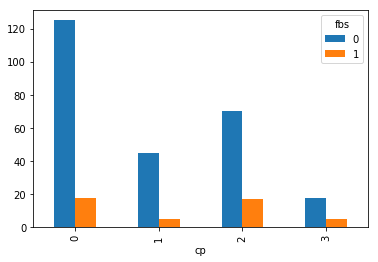

In [39]:
data_fbs.plot.bar()

## Total counts of persons that have pain (any kind) vs diabetes marker

In [40]:
data_fbs2 = data.copy()

I combine all pains (from the cp column, 1-3 are pain, 0 is absence of pain), to obtain a new column where 1 is pain (any of them) and 0 absence of pain. 

In [41]:
data_fbs2['cp_01'] = data.apply(lambda x : 1 if x['cp']==1 or x['cp']==2 or x['cp']==3 else 0, axis=1 )

In [42]:
data_fbs2 = pd.crosstab(data_fbs2['cp_01'], data_fbs2['fbs'])

In [43]:
data_fbs2

fbs,0,1
cp_01,,
0,125,18
1,133,27


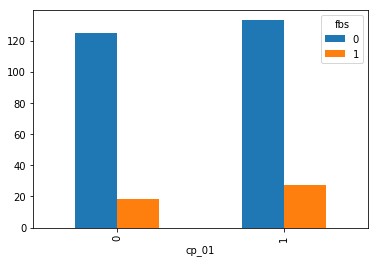

In [44]:
data_fbs2.plot.bar()

## Chi squared test to check chest pain & diabetes dependency 

At this point, I am wondering whether the presence of diabetes (fbs columns) have any correlation with the presence of chest pain (cp_01).[0 no, 1 yes].
For that, I've created a contingency tablet where the frequencies of both results are displayed.
I'll check its relation with Chi2 contingency test, with an alpha of 0.01.

H0: Both variables are independent
H1: Both variables are dependent

In [45]:
st.chi2_contingency(data_fbs2)

(0.7848509157993171,
 0.37566165097069104,
 1,
 array([[121.76237624,  21.23762376],
        [136.23762376,  23.76237624]]))

The p-value obtained force me to accept H0 and thus, accept that diabetes is independent vs chest pain. 
### The presence of diabetes has no influence on the chest pain. 

# 3.- Age relations


## Relation of Age and resting blood pressure (hypertension) (trestbps)

In [46]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

/home/atwenter/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


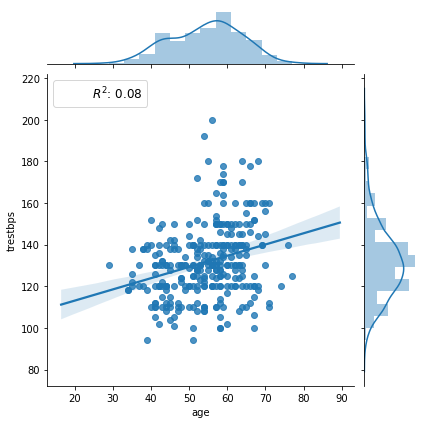

In [47]:
g = sns.JointGrid(x=data['age'], y=data['trestbps'])
g = g.plot(sns.regplot, sns.distplot)
rsquare = lambda a, b: st.pearsonr(a, b)[0] ** 2
g = g.annotate(rsquare, template="{stat}: {val:.2f}", stat="$R^2$", loc="upper left", fontsize=12)

The low value of R2 indicates that age and resting blood pressure don't correlate between each other. There isn't a dependency between them.

## Relation of Age and maximum heart rate achieved (thalach)

/home/atwenter/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/home/atwenter/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


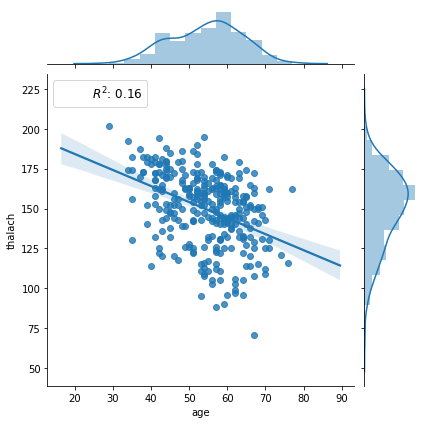

In [48]:
g = sns.JointGrid(x=data['age'], y=data['thalach'])
g = g.plot(sns.regplot, sns.distplot)
g = g.annotate(st.pearsonr)
rsquare = lambda a, b: st.pearsonr(a, b)[0] ** 2
g = g.annotate(rsquare, template="{stat}: {val:.2f}", stat="$R^2$", loc="upper left", fontsize=12)

The low value of R2 indicates that age and maximum heart rate achieved don't correlate between each other. There isn't a dependency between them.

# 4.- Maximum heart rate achieved (thalach) vs heart attack (target)

In [49]:
data_hr = data.copy()

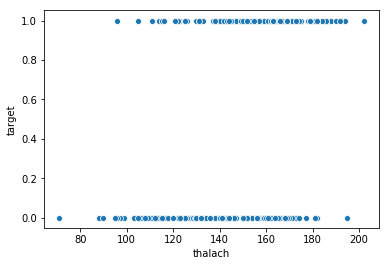

In [50]:
sns.scatterplot(x=data_hr['thalach'], y =data_hr['target'])

### Determine maximum heart rate achieved mean when the person has a heart attack (1) or not (0).

In [51]:
data_hr.groupby(by = 'target').mean()['thalach']

target
0    139.101449
1    158.466667
Name: thalach, dtype: float64

## Are those means differents? Checked them by T-Student test on two related samples. alpha = 0.01

H0: Both means are equal
H1: Both means are not equal

We use stats.ttest_ind instead of ttest_rel because both samples are not directly realted. For ttest_rel, you are suposed to have a strong relationship between the samples, i.e. same person, different exams. 

In [52]:
st.ttest_ind(data_hr[data_hr['target'] == 1]['thalach'], data_hr[data_hr['target'] == 0]['thalach'], equal_var = False)

Ttest_indResult(statistic=7.953039312035018, pvalue=5.018595443073019e-14)

### As the p-value is smaller than 0.005, we reject H0, and so we accept that both means are different.

# 5.- Exercise induced angina (exang) vs heart attack (target)

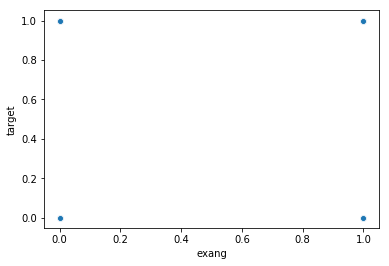

In [53]:
sns.scatterplot(x=data_hr['exang'], y =data_hr['target'])

In [54]:
data_ex = pd.crosstab(data['exang'], data['target'])

In [55]:
data_ex

target,0,1
exang,,
0,62,142
1,76,23


## Chi squared test to check exercise induced angina & heart attack dependency

At this point, I am wondering whether the exercise induced angina (exang) have any correlation with the heart attack (target).[0 no, 1 yes].
For that, I've created a contingency tablet where the frequencies of both results are displayed.
I'll check its relation with Chi2 contingency test, with an alpha of 0.01.

In [56]:
H0: Both variables are independent
H1: Both variables are dependent

SyntaxError: invalid syntax (<ipython-input-56-caa7f73138da>, line 1)

In [57]:
st.chi2_contingency(data_ex)

(55.94454996665093,
 7.454409331235655e-14,
 1,
 array([[ 92.91089109, 111.08910891],
        [ 45.08910891,  53.91089109]]))

### The small value of p-value (less than 0.005) force me to reject H0 and thus accept H1. That is, to consider that the exercise induced angina correlates with heart attack. 

# 6.- All values correlation

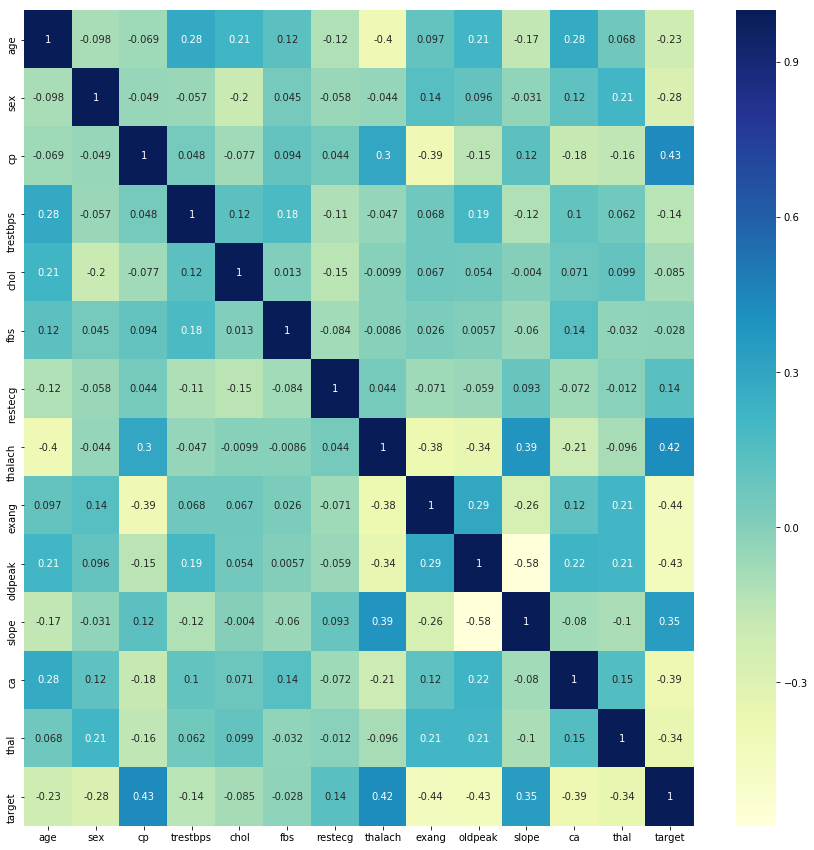

In [58]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(data.corr(), annot=True, cmap="YlGnBu")


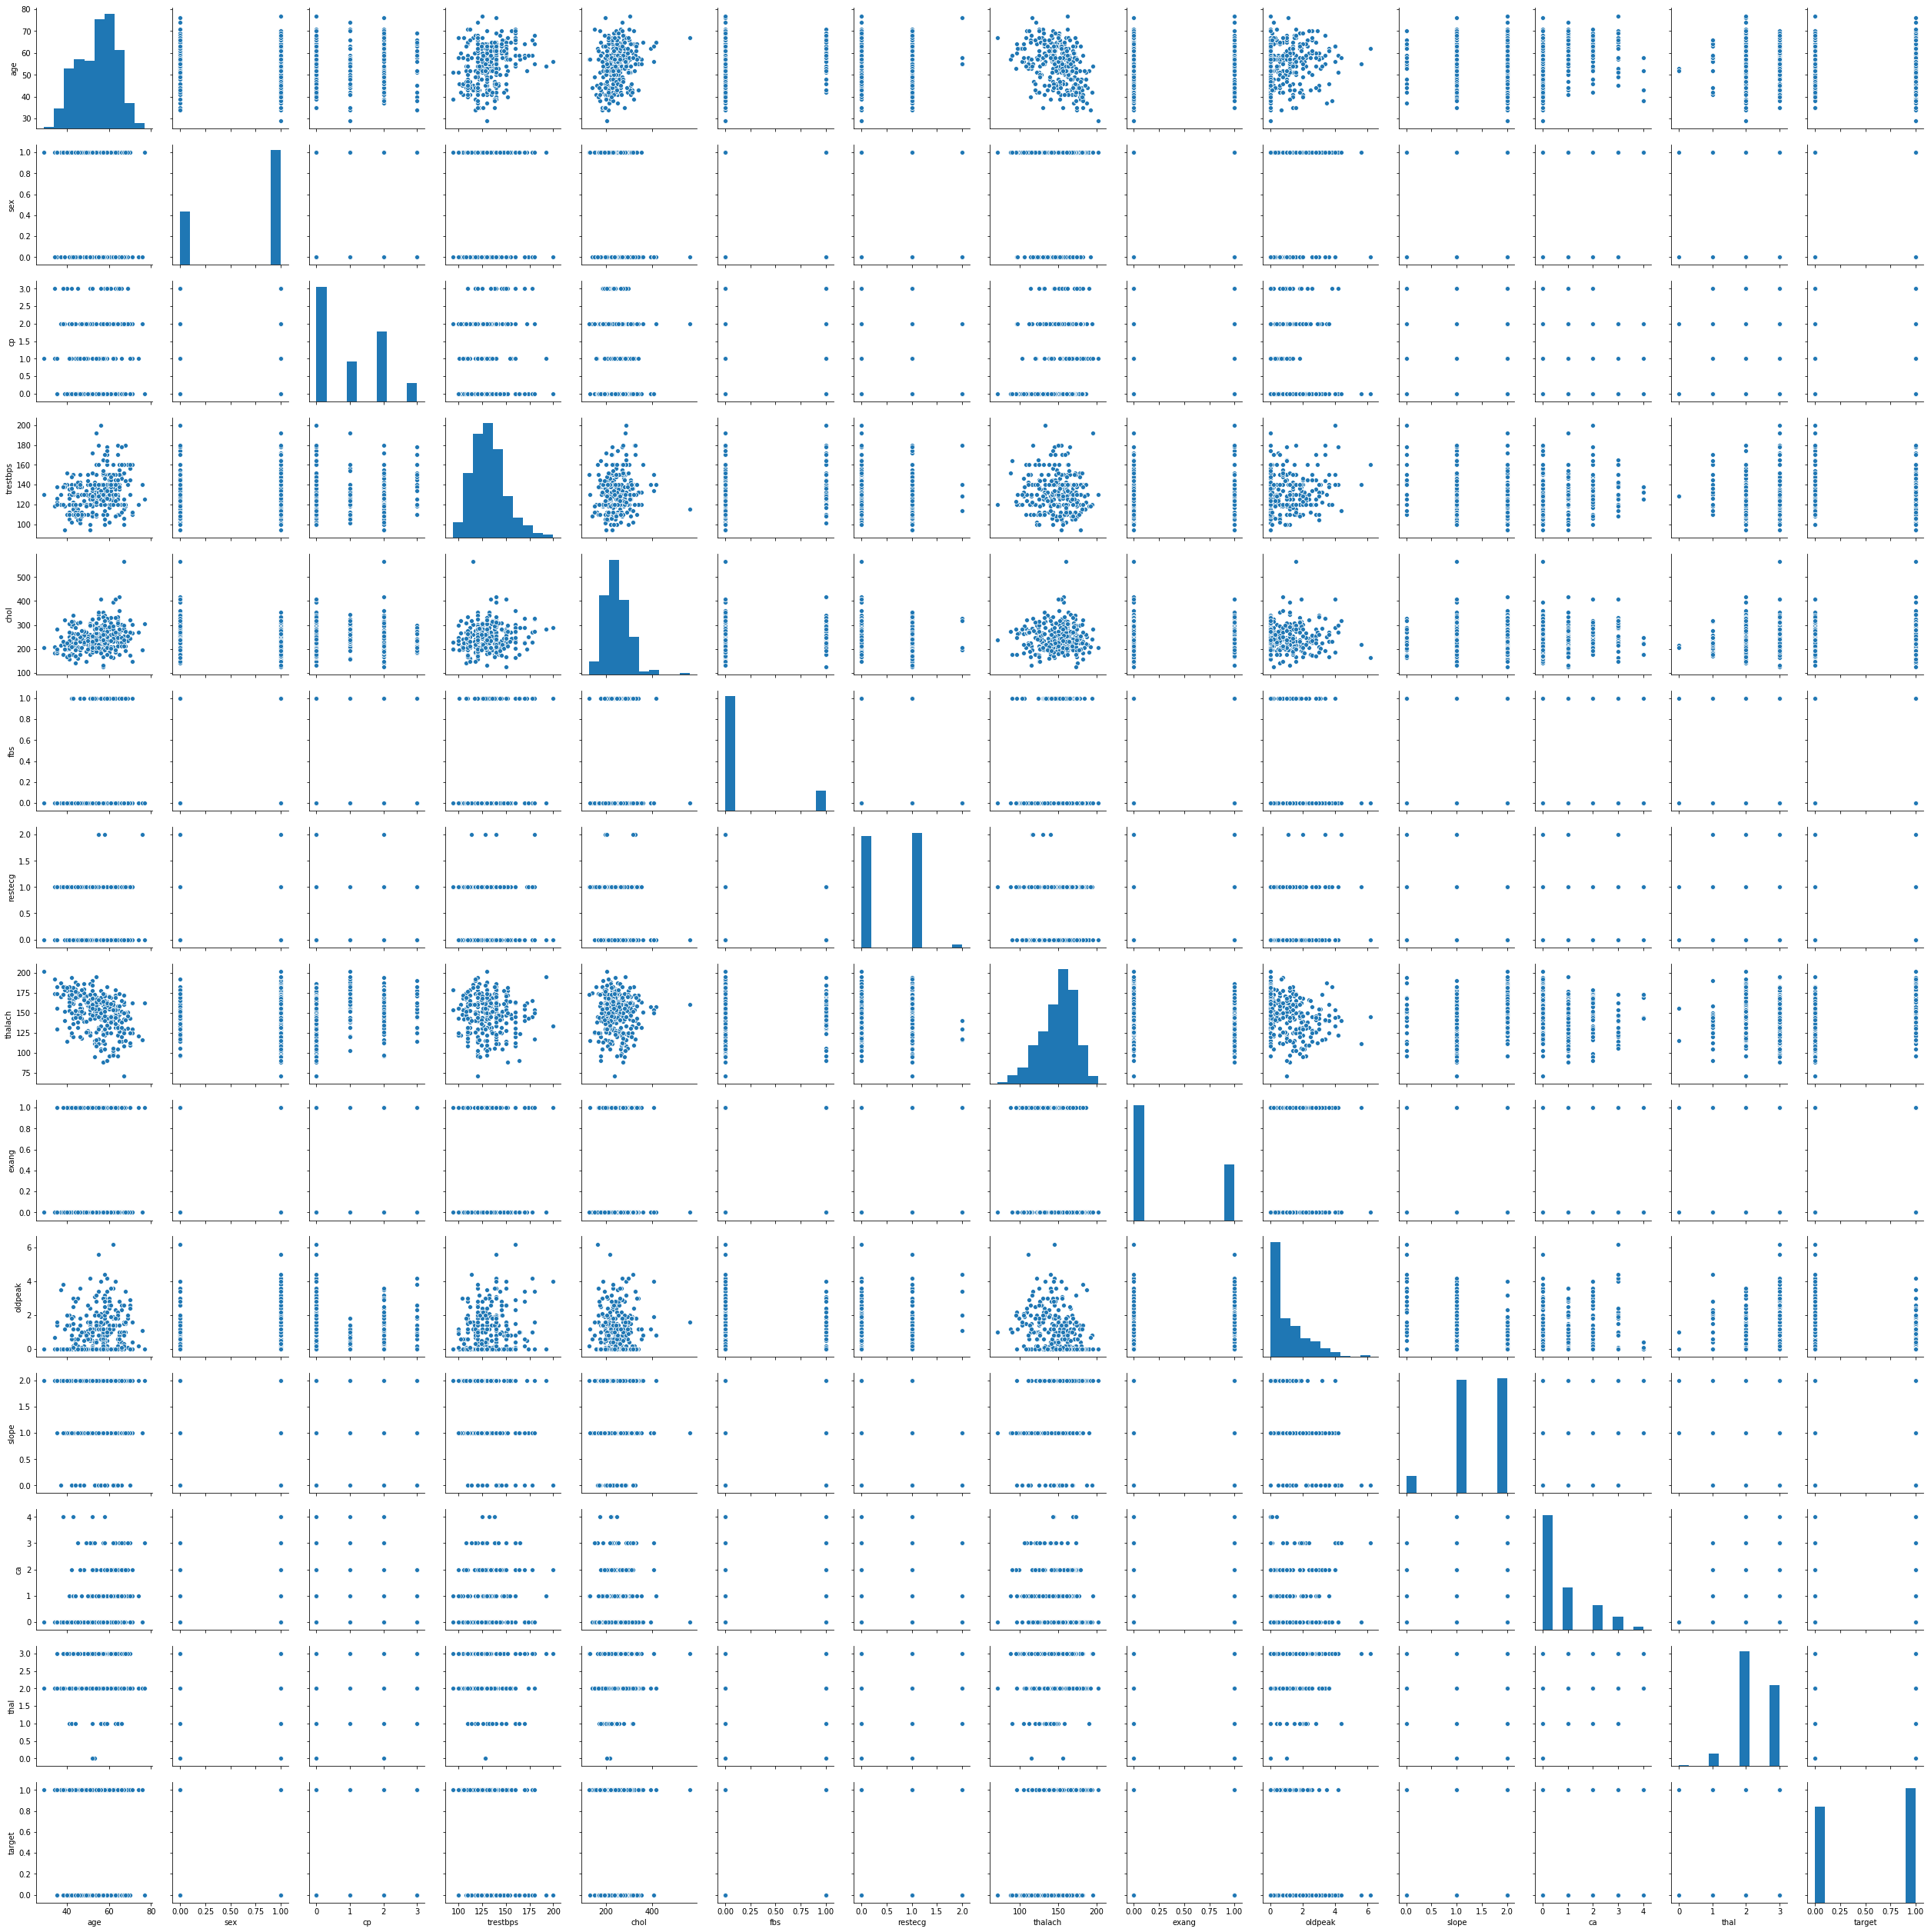

In [59]:
sns.pairplot(data)